# Эмулятор классического рынка

Сущности: потребитель, продукт и фабрика. 
    Потребитель имеет потрбеность в продукте, фиксированный доход за период и логику потребления: приобретает продукт максимального качестве, если может себе это позволить. Среди всех доступных ему продуктов максимального качества покупает самый дешёвый. 
    Продут имеет цену и единую метрику качества (чем метрика больше, тем продукт качественней). 
    Фабрика проивзодит продукт. Фабрика имеет предел по текущему качеству продукции, себестоимость, бюджет и функции проивзодства, продажи и модернизации. Фабрика производит продукт с заданными характеристиками, если это не протвиоречит параметрам фабрики. Фабрика продаёт продукт, если есть, кому его купить. Фабрика каждый период тратит случайное число денег на случайное изменение качества и цены продукта. 

# Внешние импорты

In [90]:
import random
import numpy as np
import pandas as pd

#настройки, с которыми лучше
pd.set_option('display.max_rows', 45000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.max_colwidth', 5000)

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

# Классы и функции

In [91]:
# класс потребителя
class citizen:
    def __init__(self, id=0, money=100):
        self.id=id
        self.money=money
    
    # функция потребления продуктов
    def consume(self, products):
        # возвращать будем продукт
        res=product(id=-1)
        av_pr_lst=[]
        # цикл для фильтрации тех, что не карману
        for pr in products:
            if self.money>=pr.price:
                av_pr_lst.append(pr)
        
        best_price=10000
        best_qv=0
        # цикл поиска лучшего качества
        for pr in av_pr_lst:
            if pr.quality>=best_qv:
                best_qv=pr.quality
        
        pr_qv_lst=[]
        # сбор всех продуктов лучшего качества
        for pr in av_pr_lst:
            if pr.quality==best_qv:
                pr_qv_lst.append(pr)
        
        # выбор из них тех, что дешевле
        for pr in pr_qv_lst:
            if pr.price<=best_price:
                best_price=pr.price
        
        # вывод продккта с лучшими характеристиками
        for pr in pr_qv_lst:
            if pr.price==best_price:
                res=pr
                break
        
        return res   
# класс продукта      
class product:
    def __init__(self, id=-1, quality=-100, price=-10000):
        self.id=id
        self.quality=quality
        self.price=price
        
# класс фабрики        
class factory:
    def __init__(self, id=-1, max_quality=0, cost=0, capital=1000):
        self.id=id
        self.max_quality=max_quality
        self.cost=cost
        self.capital=capital
        
    def produce(self, id, price, quality):
        if (price>self.cost) and (quality<=self.max_quality):
            return product(id=id, quality=quality, price=price)
        else:
            return product(id=-1)
        
    def check(self):
        if self.capital<0:
            return -1
        else:
            return 0
        
    def sell(self, product):
        if (self.check()==0) and (product.price>0):
            self.capital=self.capital-self.cost

        if self.check()==0 and (product.price>0):
            self.capital=self.capital+product.price


    def modernise(self, capd, costd, qvd):
        if self.max_quality+qvd>0:
            self.max_quality=self.max_quality+qvd
        if self.cost+costd>0:
            self.cost=self.cost+costd
        self.capital=self.capital+capd
        if self.capital<0:
            self.capital=0
        

In [92]:
def market(period, citizens, factories):
    products=[]
    for f in factories:
        if f.capital>0:
            p=f.produce(id=f.id, price=f.cost+1, quality=f.max_quality)
            products.append(p)
        
    cid_lst=[]
    prod_lst=[]
    fact_lst=[]
    price_lst=[]
    qv_lst=[]
    money_lst=[]
    
    for i in range(N):
        cons=citizens[i].consume(products)
        try:
            factories[cons.id].sell(cons)
            cid_lst.append(i)
            prod_lst.append(cons.id)
            fact_lst.append(cons.id)
            price_lst.append(cons.price)
            qv_lst.append(cons.quality)
            money_lst.append(citizens[i].money)
        except:
            pass

    market_log_df=pd.DataFrame([cid_lst, money_lst, prod_lst, fact_lst, price_lst, qv_lst]).T
    market_log_df.columns=['citizen_id', 'citizen_money', 'product_id', 'factory_id', 'price', 'qv']
    market_log_df['citizen_id']=market_log_df['citizen_id'].astype('int')
    market_log_df['product_id']=market_log_df['product_id'].astype('int')
    market_log_df['factory_id']=market_log_df['factory_id'].astype('int')
    return market_log_df

def cit_to_df(lst):
    ids=[]
    ms=[]
    for c in lst:
        ids.append(c.id)
        ms.append(c.money)
    
    df=pd.DataFrame([ids, ms]).T
    df.columns=['citizen_id', 'citizen_money']
    df['citizen_id']=df['citizen_id'].astype('int')
    
    return df

def fact_to_df(lst):
    ids=[]
    cap=[]
    mq=[]
    cst=[]
    for c in lst:
        ids.append(c.id)
        cap.append(c.capital)
        mq.append(c.max_quality)
        cst.append(c.cost)
    
    df=pd.DataFrame([ids, cap, mq, cst]).T
    df.columns=['factory_id', 'factory_capitalisation', 'factory_max_quality', 'factory_cost']
    df['factory_id']=df['factory_id'].astype('int')
    df['factory_max_quality']=df['factory_max_quality'].astype('int')
    
    return df
        

# Определяем структуру

In [93]:
# число жителей
N=2000
# зарплаты
max_salary=100
min_salary=5

# число заводов
k=50
# разброс расходов
max_cost=50
min_cost=15

# разброс качества
max_qv=3
min_qv=2

# разброс капитала
cap_avarage=1000
cap_disp=300

In [94]:
cit_lst=[]
for i in range(N):
    # равномерный рандом
#     cit=citizen(id=i, money=random.randint(min_salary, max_salary))
    # нормально распределённый рандом
#     cit=citizen(id=i, money=random.normalvariate((max_salary-min_salary)/2, 10))
    # распределение, похожее на реальное
    cit=citizen(id=i, money=random.gammavariate(3, 10))
    cit_lst.append(cit)

In [95]:
fact_lst=[]
for j in range(k):
    f=factory(id=j, 
              max_quality=random.randint(min_qv, max_qv), 
              cost=random.randint(min_cost, max_cost), 
              capital=random.normalvariate(cap_avarage, cap_disp)) 
    fact_lst.append(f)

In [96]:
# # для тестирования
# cit_lst=[]
# cit_lst.append(citizen(id=0, money=10))
# cit_lst.append(citizen(id=1, money=50))

# fact_lst=[]
# fact_lst.append(factory(id=0, 
#               max_quality=10, 
#               cost=3, 
#               capital=1000))

# fact_lst.append(factory(id=1, 
#               max_quality=99, 
#               cost=30, 
#               capital=5000))

# Моделируем

## Модель спроса

In [97]:
cit_df=cit_to_df(cit_lst)

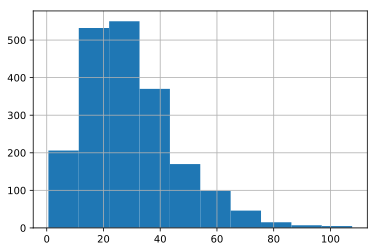

In [98]:
cit_df['citizen_money'].hist()

In [99]:
nn=[]
rng=range(1, 100, 1)
for pr in rng:
    ch=[]
    for i in range(N):
        cons=cit_lst[i].consume([product(id=1, quality=pr, price=pr)])
        if cons.id>=0:
            ch.append(cons.price)
    nn.append(len(ch))
spros_df=pd.DataFrame(nn, index=rng)

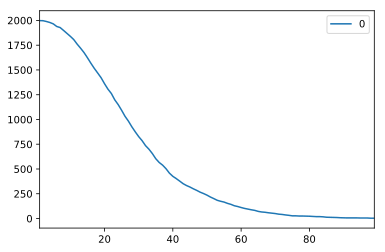

In [100]:
spros_df.plot()

## Модель предложения

In [101]:
fct_df=fact_to_df(fact_lst)

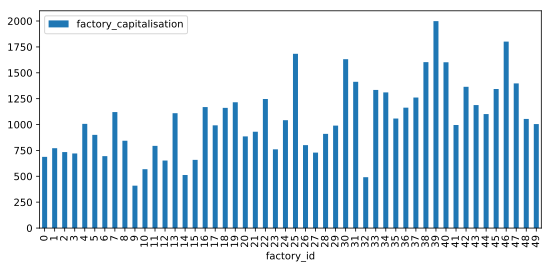

In [102]:
fct_df.set_index('factory_id')[['factory_capitalisation']].plot(kind='bar', figsize=(9,4))

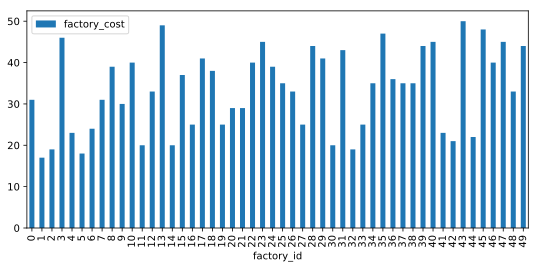

In [103]:
fct_df.set_index('factory_id')[['factory_cost']].plot(kind='bar', figsize=(9,4))

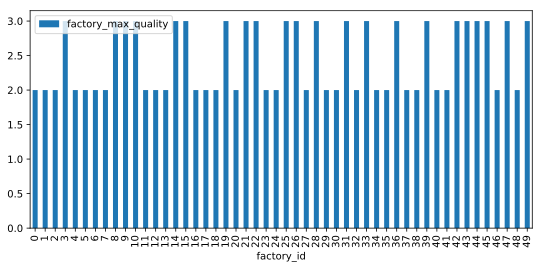

In [104]:
fct_df.set_index('factory_id')[['factory_max_quality']].plot(kind='bar', figsize=(9,4))

In [105]:
qv=2
pp=[]
rng=range(1, 100, 1) 
for pr in rng:
    pred_lst=[]
    for j in range(k):
        r=fact_lst[j].produce(id=j, price=pr, quality=qv)
        if r.price>0:
            pred_lst.append(r.price)
    pp.append(len(pred_lst))
pred_df=pd.DataFrame(pp, index=rng)

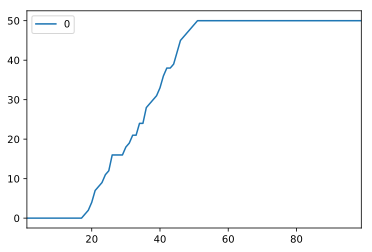

In [106]:
pred_df.plot()

## Рыночное равновесие

In [107]:
spros_df=spros_df.reset_index()
spros_df['spros_share']=spros_df[0]/np.max(spros_df[0])

pred_df=pred_df.reset_index()
pred_df['pred_share']=pred_df[0]/np.max(pred_df[0])

mrkt=spros_df.merge(pred_df, 'left', on='index')

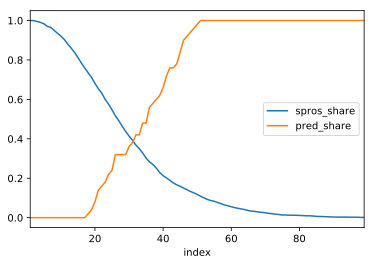

In [108]:
mrkt.set_index('index')[['spros_share', 'pred_share']].plot()

## Динамика

In [109]:
# разброс инвестиций
capd_avarage=-100
capd_disp=50

# разброс изменений себестоимости
costd_avarage=0
costd_disp=3

# разброс изменений качества
qvd_avarage=0
qvd_disp=1

In [110]:
period_num=0
factories_log=pd.DataFrame()
mrkt_log=pd.DataFrame()

period_num=0
fct_df=fact_to_df(fact_lst)
fct_df['period']=period_num
fct_df['investions']=0
fct_df['qv_diff']=0
fct_df['cost_diff']=0
fct_df['citizen_id']=0
fct_df['price']=0
factories_log=pd.concat([factories_log, fct_df ])
for period_num in range(1,50):    
    # начинаем продавать-покупать
    mrkt=market(period=period_num, citizens=cit_lst, factories=fact_lst)
    mrkt['period']=period_num
    mrkt_log=pd.concat([mrkt_log, mrkt])
    
    gr_st=mrkt.groupby(['factory_id']).agg({'citizen_id': lambda x: x.nunique(),
                                                'price': np.sum,
                                               }).reset_index()
    
    # вносим измегнения в нашу инфраструктуру
    capd_lst=[]
    costd_lst=[]
    gvd_lst=[]
    for j in range(k):
        capd=random.normalvariate(capd_avarage, capd_disp)
        costd=random.normalvariate(costd_avarage, costd_disp)
        qvd=random.normalvariate(qvd_avarage, qvd_disp)
        
        capd_lst.append(capd)
        costd_lst.append(costd)
        gvd_lst.append(qvd)
        fact_lst[j].modernise(capd, costd, qvd)


    # логируем изменения
    fct_df=fact_to_df(fact_lst)
    
    fct_df['period']=period_num
    fct_df['investions']=capd_lst
    fct_df['qv_diff']=gvd_lst
    fct_df['cost_diff']=costd_lst
    
    
    fct_df=fct_df.merge(gr_st, 'left', on='factory_id')
    factories_log=pd.concat([factories_log, fct_df])
    


In [111]:
mrkt_log[0:3]

,citizen_id,citizen_money,product_id,factory_id,price,qv,period
0,0,42.390234,14,14,21.0,3.0,1
1,1,24.928737,14,14,21.0,3.0,1
2,2,7.554247,-1,-1,-10000.0,-100.0,1


In [112]:
factories_log[0:3]

,factory_id,factory_capitalisation,factory_max_quality,factory_cost,period,investions,qv_diff,cost_diff,citizen_id,price
0,0,687.829633,2,31.0,0,0.0,0.0,0.0,0.0,0.0
1,1,771.223975,2,17.0,0,0.0,0.0,0.0,0.0,0.0
2,2,734.158519,2,19.0,0,0.0,0.0,0.0,0.0,0.0


In [113]:
diff=factories_log.groupby('period').mean()[['investions','qv_diff', 'cost_diff']]

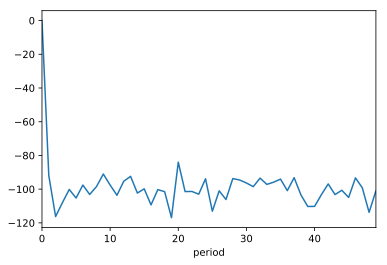

In [114]:
diff['investions'].plot()

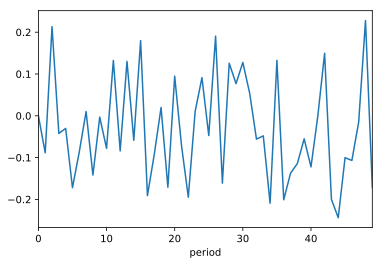

In [115]:
diff['qv_diff'].plot()

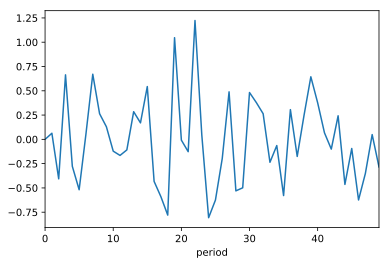

In [116]:
diff['cost_diff'].plot()

In [117]:
sales=factories_log[factories_log['citizen_id']>0]

In [118]:
sales[0:3]

,factory_id,factory_capitalisation,factory_max_quality,factory_cost,period,investions,qv_diff,cost_diff,citizen_id,price
1,1,820.778446,1,18.548028,1,-113.445528,-0.171606,1.548028,163.0,2934.000000
14,14,1798.431841,4,22.628004,1,-20.260307,1.549412,2.628004,1306.0,27426.000000
4,4,980.403195,5,20.963613,2,-84.896860,2.930542,2.389088,215.0,4208.522872


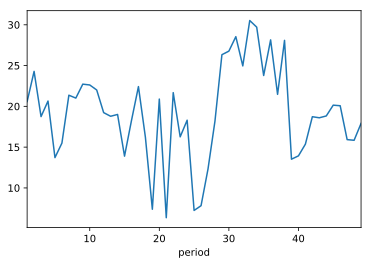

In [119]:
sales.groupby('period').mean()['factory_cost'].plot()

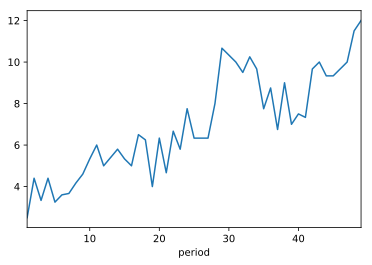

In [120]:
sales.groupby('period').mean()['factory_max_quality'].plot()

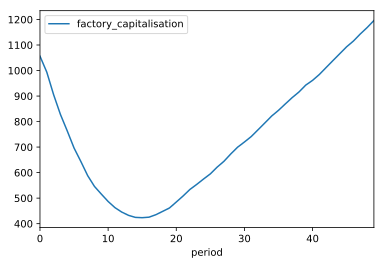

In [121]:
factories_log.groupby('period').mean()[['factory_capitalisation']].plot()

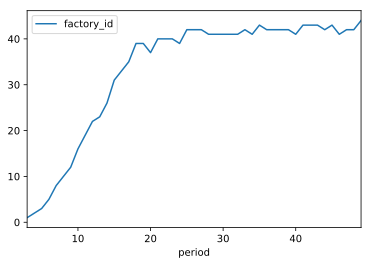

In [122]:
factories_log[factories_log['factory_capitalisation']<=0].groupby('period').agg(
    {'factory_id': lambda x: x.nunique()}).plot()

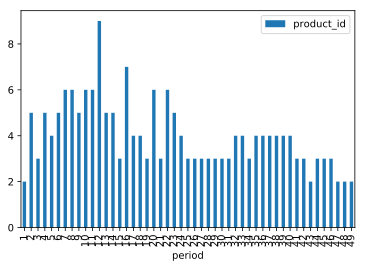

In [123]:
mrkt_log[mrkt_log['product_id']>0].groupby('period').agg({'product_id': lambda x: x.nunique()}).plot(kind='bar')

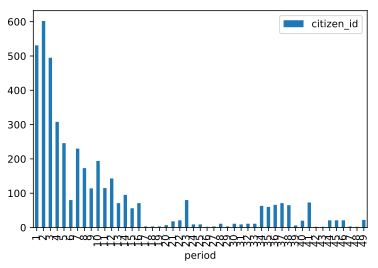

In [124]:
mrkt_log[mrkt_log['product_id']==-1].groupby('period').agg({'citizen_id': lambda x: x.nunique()}).plot(kind='bar')

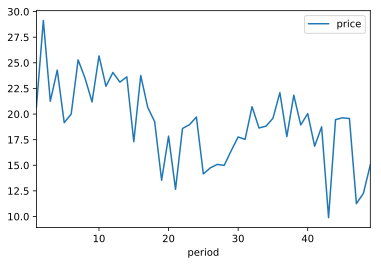

In [125]:
mrkt_log[mrkt_log['product_id']>0].groupby('period').mean()[['price']].plot()

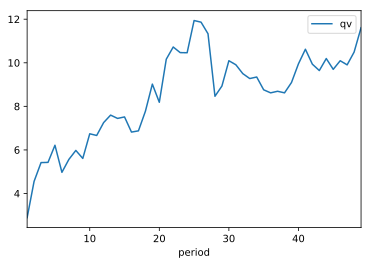

In [126]:
mrkt_log[mrkt_log['product_id']>0].groupby('period').mean()[['qv']].plot()

In [127]:
mrkt_log.groupby(['period', 'product_id', 'price', 'qv']).agg({'citizen_id': lambda x: x.nunique(),
                                               }
                                              )

citizen_id
period product_id price         qv                     
1      -1         -10000.000000 -100.000000         531
        1          18.000000     2.000000           163
        14         21.000000     3.000000          1306
2      -1         -10000.000000 -100.000000         602
        4          19.574525     2.741778           215
        5          19.386608     2.403361            14
        14         23.628004     4.549412           350
        19         30.263791     4.836710           244
        25         35.804377     5.171312           575
3      -1         -10000.000000 -100.000000         495
        4          21.963613     5.672321          1264
        14         17.539357     4.317070           223
        30         17.190707     1.213042            18
4      -1         -10000.000000 -100.000000         308
        4          24.712330     5.916457           225
        5          16.969970     5.447247           210
        14         20.887125     5.744776           191
        19         28.694281     6.104735           893
        30         13.639633     0.920067           173
5      -1         -10000.000000 -100.000000         246
        5          16.727609     4.304659           206
        14         20.500542     7.185655          1327
        30         12.165662     1.326435           118
        32         14.759050     3.110776           103
6      -1         -10000.000000 -100.000000          80
        5          14.544647     4.499683           113
        6          24.073315     5.827277          1146
        12         16.716233     4.921581           234
        14         21.163971     5.512633           153
        30         7.351065      1.326435           274
7      -1         -10000.000000 -100.000000         230
        5          12.123558     3.681274           254
        12         18.395046     5.413350           522
        14         17.210360     4.679782            55
        15         39.171205     6.590212           452
        30         11.715981     2.205108            13
        42         27.995998     5.955273           474
8      -1         -10000.000000 -100.000000         173
        14         16.119292     3.683340            29
        15         37.287890     6.967123           528
        16         13.484731     3.646729           140
        19         16.639175     6.349679           831
        21         32.961536     6.420005           174
        30         10.397683     1.828617           125
9      -1         -10000.000000 -100.000000         114
        16         12.062279     4.608237           224
        21         38.713469     6.846507           476
        30         8.495279      1.055122           129
        41         16.690117     5.818699          1053
        43         38.426791     6.228994             4
10     -1         -10000.000000 -100.000000         194
        14         11.005031     3.913055           115
        16         13.644382     3.961074           191
        19         17.315197     6.009338           700
        42         30.488171     7.127539           161
        43         34.354532     8.773548           444
        45         52.375621     8.803797           195
11     -1         -10000.000000 -100.000000         115
        14         8.529464      3.469216           269
        19         15.193660     5.564023           643
        21         32.739114     8.681911           710
        41         27.187556     5.872947            66
        42         28.312582     7.324909            43
        43         29.198414     7.677278           154
12     -1         -10000.000000 -100.000000         143
        12         22.574134     5.106584           132
        14         10.124719     1.598133            25
        16         9.472381      1.549538            23
        19         13.689764     4.707719           465
        21         32.565519     10.459064          717
        30   

In [134]:
#31 41
factories_log[factories_log['factory_id']==41]

,factory_id,factory_capitalisation,factory_max_quality,factory_cost,period,investions,qv_diff,cost_diff,citizen_id,price
41,41,995.182330,2,23.000000,0,0.000000,0.000000,0.000000,0.0,0.000000
41,41,854.141108,0,22.324979,1,-141.041222,-1.304523,-0.675021,NaN,NaN
41,41,789.360873,1,23.935385,2,-64.780235,0.967363,1.610406,NaN,NaN
41,41,638.673256,0,21.865491,3,-150.687617,-1.463685,-2.069894,NaN,NaN
41,41,615.228141,0,22.821406,4,-23.445115,-0.337313,0.955915,NaN,NaN
41,41,526.627971,2,19.806309,5,-88.600170,2.210109,-3.015097,NaN,NaN
41,41,400.689459,5,19.039603,6,-125.938512,2.693207,-0.766706,NaN,NaN
41,41,317.514719,5,17.176686,7,-83.174740,0.172041,-1.862917,NaN,NaN
41,41,152.435970,5,15.690117,8,-165.078749,0.544187,-1.486569,NaN,NaN
41,41,1175.498447,4,22.891796,9,-29.937523,-0.997341,7.201679,1053.0,17574.692876


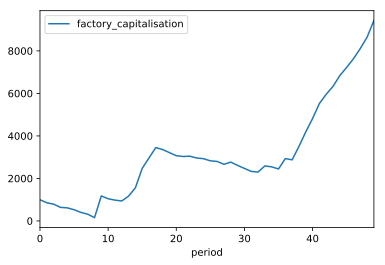

In [139]:
factories_log[factories_log['factory_id']==41].set_index('period')[
    ['factory_capitalisation']].plot()

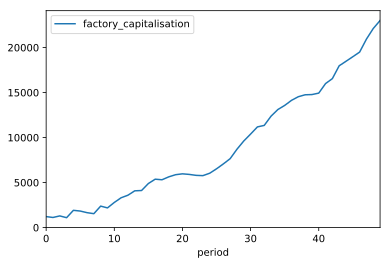

In [136]:
factories_log[factories_log['factory_id']==19].set_index('period')[['factory_capitalisation']].plot()

In [130]:
mrkt_log[mrkt_log['period']==49].groupby('product_id').agg({'citizen_id': lambda x: x.nunique()})

,citizen_id
product_id,
-1,22
19,1130
41,848


In [132]:
#31 41
factories_log[factories_log['factory_id']==20]

,factory_id,factory_capitalisation,factory_max_quality,factory_cost,period,investions,qv_diff,cost_diff,citizen_id,price
20,20,885.325744,2,29.000000,0,0.000000,0.000000,0.000000,0.0,0.0
20,20,788.805807,2,32.635769,1,-96.519937,0.474335,3.635769,NaN,NaN
20,20,574.241919,4,33.450276,2,-214.563888,1.563672,0.814507,NaN,NaN
20,20,470.988017,4,41.943241,3,-103.253901,0.957671,8.492965,NaN,NaN
20,20,399.392809,4,42.435065,4,-71.595209,-0.625879,0.491824,NaN,NaN
20,20,344.847948,3,45.632632,5,-54.544861,-0.658198,3.197567,NaN,NaN
20,20,288.950576,3,47.958224,6,-55.897372,-0.494051,2.325592,NaN,NaN
20,20,173.886322,4,47.447346,7,-115.064254,1.485207,-0.510878,NaN,NaN
20,20,65.825721,4,44.797757,8,-108.060601,-0.550727,-2.649589,NaN,NaN
20,20,0.000000,4,42.491910,9,-128.876087,0.033738,-2.305847,NaN,NaN
